In [113]:
import os
os.chdir('/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py')

from functions import *
from flags import * 

import psycopg2
from psycopg2 import OperationalError
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import HTML
import webbrowser

In [114]:
conn = psycopg2.connect(
    host = "contratos-base-gov1.cf87yxnqgph8.eu-central-1.rds.amazonaws.com",
    port = 5432,
    #database = "contratosbasegov",
    user = "contratosbasegov",
    password = "8n9nyeTBFUyCcLJShNrZdPUai2KQkue4")

cur = conn.cursor()

In [115]:
cur.execute('''ROLLBACK;''')

In [121]:
def contratos(ide):
    '''
    Função que retorna contratos referentes a um conjunto de ids

    Parâmetros :
        ide : tuplo de id's de anúncios

    return:
        dataframe com contratos
    '''
        
    cur = conn.cursor()
    cur.execute('''
        SELECT *
        FROM "contratos"
        WHERE id IN %s; ''', (tuple(ide),))
    return pd.DataFrame(cur.fetchall())

In [131]:
# Filtrar contratos : concursos públicos com CPV's começados por 72
cpub = sorted(cpv('72', 'Concurso público'))

In [133]:
cp = contratos(cpub)

In [134]:
cp = cp.rename(columns={0:'ID', 1:'NrAnuncio', 2:'PrecoBase', 18:'PrecoContratual'})
h(cp.head(2))

ID,NrAnuncio,PrecoBase,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,PrecoContratual,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
10102898,8779/2023,147281.22,6,False,6531095,13082899,2023-05-29,103,2,False,False,https://dre.pt/application/file/213665049,Anúncio de procedimento,Concurso público,"AQUISIÇÃO, ATUALIZAÇÃO E MANUTENÇÃO DE SOFTWARE DE SUPORTE AOS SERVIÇOS MUNICIPAIS",2023-07-01,2023-06-30,136107.54,884,Município de Chaves (501205551)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=261),"Artigo 20.º, n.º 1, alínea b) do Código dos Contratos Públicos","Claranet II Solutions, SA (510728189)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=454083)",INETUM ESPAÑA SA (980079659),https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=348186,https://community.vortal.biz/PRODPublic/Tendering/OpportunityDetail/Index?noticeUID=PT1.NTC.2409446,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2022047&ext=.pdf,false,72320000-4,False,None,None,False,False,None,False,None,False,Aquisição de serviços,Serviços relacionados com bases de dados,Principal,136107.54,"AQUISIÇÃO, ATUALIZAÇÃO E MANUTENÇÃO DE SOFTWARE DE SUPORTE AOS SERVIÇOS MUNICIPAIS",Não aplicável,None,"Portugal, Vila Real, Chaves",Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",None,None,1700144451
10103294,19/2023,1126057.64,14,False,6203288,12444199,2023-01-05,4,2,False,False,https://dre.pt/application/file/205756951,Aviso de prorrogação de prazo,Concurso público,Serviços de desenvolvimento aplicacional para o Projeto APP SNS 24 do Pilar 2 - Reforma dos SI disponibilizados ao cidadão - Lote 2 - Consultor de desenvolvimento de Software (PRR),2023-07-03,2023-06-21,318790.08,553,"SPMS- Serviços Partilhados do M. da Saúde, E.P.E. (509540716)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=190896)","Artigo 20.º, n.º 1, alínea a) do Código dos Contratos Públicos","AXIANSEU II DIGITAL CONSULTING, S.A. (501774360)(https://www.base.gov.pt/Base4/pt/detalhe/?type=entidades&id=15639)","BABEL IBÉRICA, S.A. (507025229)|||BOOST IT, Lda. (514756217)|||CAPGEMINI PORTUGAL, S.A. (504272179)|||Dellent Consulting, Lda (513266488)|||worldIT Sistemas de informação (506677702)|||Sys-Match - Consultores de Sistemas de Informação, Lda (504665901)|||INDRA III SOLUÇÕES TECNOLOGIA (TECNOCOMPORT) (503222364)|||IGNÍT PEOPLE, S.A. (515777048)",https://www.base.gov.pt/Base4/pt/detalhe/?type=anuncios&id=336414,https://community.vortal.biz/PRODPublic/Tendering/OpportunityDetail/Index?noticeUID=PT1.NTC.2170700,https://www.base.gov.pt/Base4/pt/resultados/?type=doc_documentos&id=2022155&ext=.pdf,false,72500000-0,False,None,None,True,False,None,False,None,False,Aquisição de serviços,Serviços relacionados com a informática,Principal,318790.08,Serviços de desenvolvimento aplicacional para o Projeto APP SNS 24 do Pilar 2 - Reforma dos SI disponibilizados ao cidadão - Lote 2 - Consultor de desenvolvimento de Software (PRR),Não aplicável,None,"Portugal, Lisboa<BR/>Portugal, Porto",Não aplicável.,Não aplicável.,None,False,False,None,None,False,None,True,None,"Código dos Contratos Públicos (DL111-B/2017) e Lei n.º 30/2021, de 21.05",Plano de Recuperação e Resiliência (PRR) – artigo 6º da Lei n.º30/2021,None,1700146349


In [138]:
# Preço Base e Preço Contratual de todos os contratos públicos realizados para CPV's começados por 72
pb = preco_base3(cpub)
pc = preco_contrato3(cpub)

# O preço base e o preço contratual estão a ser obtidos de forma correta da base de dados
# O problema é que o ID não corresponde ao contrato. Quando dou os ids como input à função contratos - sendo que estes ids são provenientes da função cpv() - ele ordena os contratos por ordem crescente de ID 
# Já funciona : foi necessário colocar os ids provenientes de cpv() por ordem crescente

pb[1], pc[1], cpub[1]

(1126057.64, 318790.08, ('10103294',))

In [139]:
f = redflag(pb, pc, 0.1, cpub, 20)

/home/francisco/MECAD/2º Ano/Estágio/forcera/scripts/scripts_py/flags.py:75: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = pbase[i] / pcontr[i]


/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

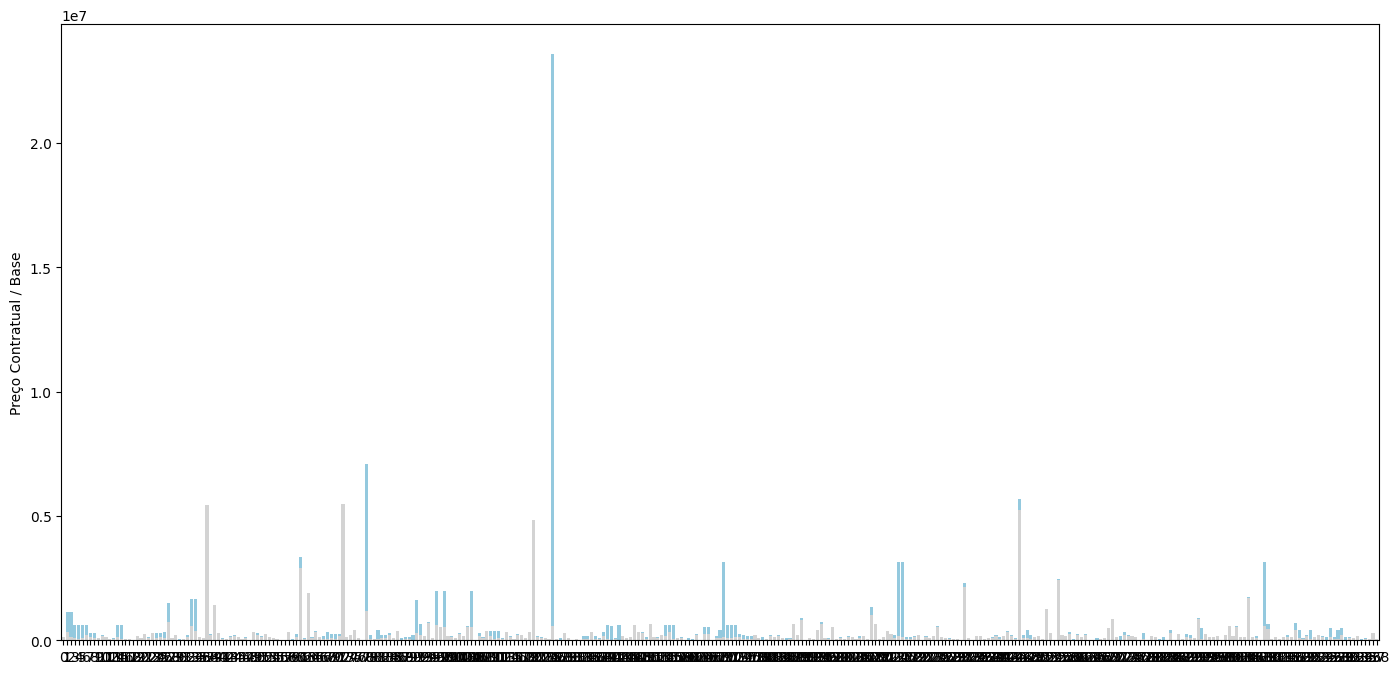

In [140]:
# Plot do Preço Base vs Preço Contratual para ver diferenças entre ambos para um mesmo contrato
df = contratos(cpub).iloc[:,[2,18]]
df = df.rename(columns={2: 'PrecoBase', 18:'PrecoContratual'})
df = df.astype('float')

plt.figure(figsize=(17,8))
sns.barplot(x = df.index, y = df.PrecoBase, color = 'skyblue')
sns.barplot(x = df.index, y = df.PrecoContratual, color = 'lightgray', fill=0.1)
plt.ylabel('Preço Contratual / Base')
plt.show()

In [141]:
# Índice com preço contratual nulo
np.where(pc == 0)

(array([272]),)

In [142]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

(np.round(pb/pc, 4))

/tmp/ipykernel_147668/2437271471.py:4: RuntimeWarning: divide by zero encountered in divide
  (np.round(pb/pc, 4))


array([ 1.082,  3.532,  8.593,  7.996, 13.382,  5.375,  2.966,  1.84 ,
        3.216,  1.038,  1.372,  1.022,  1.155,  1.742,  4.613, 16.608,
        1.   ,  1.   ,  1.   ,  1.196,  1.001,  1.   ,  1.671,  1.   ,
        4.291,  2.023,  3.971,  2.   ,  1.   ,  1.   ,  1.566,  1.001,
        1.541,  2.835,  4.24 ,  1.085,  1.021,  1.001,  1.058,  1.   ,
        1.   ,  2.041,  1.   ,  1.407,  1.112,  1.   ,  1.026,  1.474,
        2.445,  1.   ,  1.412,  1.193,  1.04 ,  1.002,  1.003,  1.04 ,
        1.252,  1.429,  1.001,  1.25 ,  1.816,  1.154,  1.843,  1.   ,
        1.816,  1.066,  1.001,  2.713,  8.62 ,  2.542,  3.587,  1.387,
        1.   ,  1.01 ,  1.007,  1.   ,  1.016,  1.385,  6.05 ,  3.242,
        1.262, 11.177,  1.931,  2.085,  1.328,  1.033,  1.   ,  4.688,
        3.143,  2.973,  7.779,  5.73 ,  2.986,  1.   ,  1.072,  1.007,
        3.212,  1.005,  3.755,  1.014,  1.267,  1.   ,  1.164,  1.   ,
        1.036,  3.732,  1.006,  1.687,  1.209,  1.083,  2.299,  9.293,
      

/tmp/ipykernel_147668/3234519312.py:1: RuntimeWarning: divide by zero encountered in divide
  sns.histplot(pb/pc)
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/francisco/MECAD/COMP/comp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


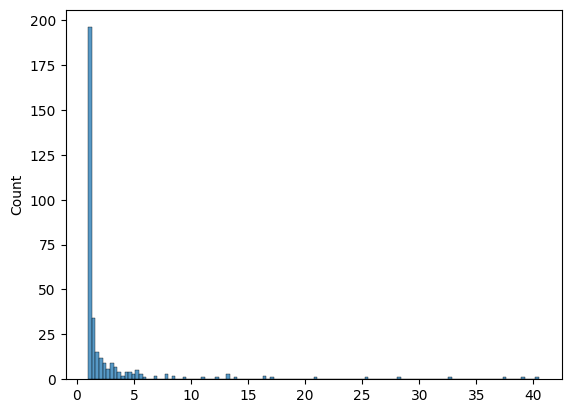

In [143]:
sns.histplot(pb/pc)
plt.show()

***

<br>

<br>

Verificar a situação em que o preco base é muito maior do que o preço contratual

1. pegar no maior valor do rácio pb/pc
2. verificar pb e pc
3. verificar rácio
4. obter id e verificar que bate certo usando o função contrato()
5. obter o número de anúncio
6. calcular o número de ocurrências do anúncio
7. obter id's para o mesmo número de anúncio
8. somar precos contratuais
9. comparar novamente com o preço base


**1.**

In [155]:
# Índice do contrato com maior rácio 
rat = pb/pc
rat5 = np.where(rat > 5)[0]

print(np.where(rat > 5), '\n\n', rat[np.where(rat > 5)])

print('\n\n\n Índice do maior rácio :', np.where(rat > 40)[0])

(array([  2,   3,   4,   5,  15,  68,  78,  81,  90,  91, 111, 126, 128,
       140, 141, 143, 157, 170, 171, 172, 180, 186, 215, 216, 248, 260,
       266, 272, 283, 293, 309, 318, 321, 325, 328]),) 

 [ 8.593  7.996 13.382  5.375 16.608  8.62   6.05  11.177  7.779  5.73
  9.293 40.503  5.055 16.608 28.361 37.36  12.347 20.904  7.996  5.375
 39.    13.165 16.998 25.295  5.446 32.779  5.323    inf 13.114 13.813
  5.629  5.214  6.991  5.773  6.991]



 Índice do maior rácio : [126 272]


/tmp/ipykernel_147668/3050279265.py:2: RuntimeWarning: divide by zero encountered in divide
  rat = pb/pc


**2.**

In [156]:
pb[126],pc[126], pb[126]/pc[126]

(23589062.0, 582400.0, 40.503197115384616)

**3.**

In [158]:
print(cpub[126])

contrato('10196797')

('10196797',)


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,10196797,690/2022,23589062.00,29,True,5839051,11647550,2022-04-11,71,2,...,None,None,False,None,True,Os preços unitários encontram-se estipulados d...,Código dos Contratos Públicos (DL111-B/2017) e...,None,None,1700122402


**4**